# Lemmatization, pos tagging, and digitized books

Lemmatization of words is to find the base form of a word. The base form is called a lemma. 

To do this, we need to know the grammatical category of words; noun, verb, adjective, or adverb. Because the same word can have different base form depending on its word class. The process of getting to know the grammatical category of words is called "Part-Of-Speech tagging".

The NLTK library can be used in this process. Other libraries can be used as well, for example Spacy.

In the script below, the `nltk.pos_tag` is used to add the grammatical category to each word. These tags must then be converted to WordNet format using a function called `pos_tagger`.

WordNet is a comprehensive lexical database for the English language, where words are organized into synsets (synonym sets) based on their meaning.

WordNet uses specific conventions to represent grammatical categories: `wordnet.ADJ` for adjectives, `wordnet.VERB` for verbs, `wordnet.NOUN` for nouns, and `wordnet.ADV` for adverbs.

When POS-tags are converted to WordNet format, the `WordNetLemmatizer` can be used to lemmatize the words correctly. If a word does not have an available POS-tag, then the word is included without changes.


A lemmatization of the text data will often be part of the preprocessing of the text data, and it will occur as a prelude to an analysis. This means that before we get to lemmatization, we need to load the text, clean it, and remove stop words. After lemmatization, we perform a visualization of some of the words that frequently appear in the text. The visualization is intended as an example of why lemmatization can be a smart thing to do.

## Dowload a digitized book from the Royal Danish Library

In this note book we wil work with the book _[Carr, John. A Northern Summer: Or Travels Round the Baltic, through Denmark, Sweden, Russia, Prussia, and Part of Germany, in the Year 1804. 1805.
](https://soeg.kb.dk/permalink/45KBDK_KGL/1pioq0f/alma99122600818605763)_

The deals with travel experiences, cultural observations, and historical contexts countries around the Baltic Sea,

The book was digitized in 2017 and was originally categorized under the subject History - The Three Nordic Kingdoms.
 
This is the link to the online edition: [https://www.kb.dk/e-mat/dod/130022078187_bw.pdf](https://www.kb.dk/e-mat/dod/130022078187_bw.pdf)

In [2]:
#! pip install PyPDF2
import requests
from io import BytesIO
from PyPDF2 import PdfReader

# URL to the ocr scanned, pdf verison of the text
url = "https://www.kb.dk/e-mat/dod/130022078187_bw.pdf"

# Download the pdf file
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Open the pdf file in memory
pdf_file = BytesIO(response.content)

# Create a PDF reader object
reader = PdfReader(pdf_file)

# Extract text from each page starting from page 5
text_content = []
for page in reader.pages[7:]:
    text_content.append(page.extract_text())

# Join all the text content into a single string
full_text = "\n".join(text_content)

# Print the extracted text
print(full_text[0:100])

A« »
N O R T H E R N  SU M M E R  ;
OR
TRAV L 'S
ROUND
T H E  B A LTIC ,
THROUGH
DENMARK, SW E D E N


In [3]:
import re
def clean(text): 

    # solving a hyphen-newline issue. 
    text = text.replace('-\n', '')
    
    # match a variety of punctuation and special characters
    # backslash \ and the pipe symbols | plays important roles, for example here \? 
    # Now it is a good idea to look up a see what \ and | does 
    text = re.sub(r'\.|«|,|:|;|!|\?|\(|\)|\||\+|\'|\"|‘|’|“|”|\'|\’|…|\-|_|–|—|\$|&|\*|>|<|\/|\[|\]', ' ', text)

    # Regex pattern to match numbers and words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    
    # remove all characters that are not letters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)
  
    # Remove words with length 2 or less
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # sequences of white spaces 
    text = re.sub(r'\s+', ' ', text) 

    # lower the letters
    text = text.lower()

    # return the text
    return text
    

clean_full_text = clean(full_text)

In [4]:
clean_full_text[:1000]

' trav round ltic through denmark russia and year carr esq aothor the steanger francs src hond print for richard phillips bridge street blackfriars gili salisbury square arf the honourable sir james mackintosh knt recorder bombay sir while you imparting new light those regions gloriously illuminated the genius and the virtues the late sir william jon will you allow traveller expr his thoughts you contemplating your character and situ ation cannot but felicitate that race fel low creatures who are placed within the protection your judicial care yet recollecting how mmany listened you with dehght this country feel your distance from iri one point view source national regret conscious that these sentiments are sincere encouraged them request that you will honour with indulgent acceptance book whose author has endeavoured unite amusement and information doubtful success each his purposes anxious conciliate favour introclucing his performance the public under the shelter your name name that

## Remove stopwords

In [5]:
# remove stopwords
import urllib.request

#import an English stopword list
url = "https://sciencedata.dk/shared/5dad7af4b0c257e968111dd0ce19eb99?download"
en_stop_words = urllib.request.urlopen(url).read().decode().split()
# Add additional stopwords using Pythons list append() method
en_stop_words.extend(['■', '%', '»', '•', '^', '\\', '-'])

# text data in
text = clean_full_text

# Change text to wordlist
tokens = text.split()
tokens_wo_stopwords = [i for i in tokens if i.lower() not in en_stop_words]

## Lemmatization and POS tagging

In [11]:
# Importing the Natural Language Toolkit (nltk) library
# nltk.download('averaged_perceptron_tagger_eng') (only first time)
# nltk.download('wordnet') (only first time)
import nltk
from nltk.stem import WordNetLemmatizer

# Downloading the 'averaged_perceptron_tagger' model, which is used for part-of-speech tagging
nltk.download('averaged_perceptron_tagger')

# Importing the WordNet corpus from nltk, which is used for lemmatization
from nltk.corpus import wordnet

# Initializing the WordNetLemmatizer, which is used to lemmatize words
lemmatizer = WordNetLemmatizer()


# Function to convert nltk POS tags to WordNet POS tags
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif nltk_tag.startswith('V'):
        return wordnet.VERB  # Verb
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN  # Noun
    elif nltk_tag.startswith('R'):
        return wordnet.ADV  # Adverb
    else:
        return None  # If the tag doesn't match, return None

# Send in a list of words
in_data_list = tokens_wo_stopwords

# Performing part-of-speech tagging on the input data list
pos_tagged = nltk.pos_tag(in_data_list)

# Mapping the nltk POS tags to WordNet POS tags
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

# Initializing an empty list to store lemmatized words
lemmatized_word_list = []

# Iterating over the word and its corresponding WordNet POS tag
for word, tag in wordnet_tagged:
    if tag is None:
        # If no valid WordNet POS tag, append the original word
        lemmatized_word_list.append(word)
    else:
        # Lemmatize the word using the WordNet POS tag
        lemmatized_word_list.append(lemmatizer.lemmatize(word, tag))

# List of lemmatized words
#lemmatized_word_list[0:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lakj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


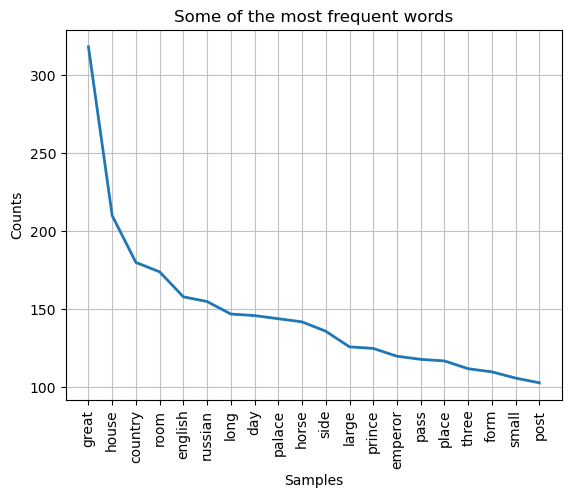

In [10]:
import matplotlib.pyplot as plt
fdist_filtered = nltk.FreqDist(lemmatized_word_list).plot(20, title='Some of the most frequent words')

### Sources:
- https://www.nltk.org/book/ch05.html
- https://www.nltk.org/howto/wordnet.html
- https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/ 
- https://medium.com/@kevinnjagi83/lemmatization-in-nlp-2a61012c5d66
- [Carr, John. A Northern Summer: Or Travels Round the Baltic, through Denmark, Sweden, Russia, Prussia, and Part of Germany, in the Year 1804. 1805.
](https://soeg.kb.dk/permalink/45KBDK_KGL/1pioq0f/alma99122600818605763)
